# Proyecto 1 — CNN (CIFAR-10)

In [1]:
import sys
sys.path.append('../src')

from data import FashionMNISTData
from models import create_cnn_model, create_simple_cnn_model, compile_model
from train import FashionMNISTTrainer
from utils import (print_welcome_message, print_completion_message, 
                   save_training_results, save_summary_csv, plot_training_history,
                   plot_confusion_matrix, plot_examples, calculate_metrics,
                   plot_sample_images)

# Configuración específica del notebook
NOTEBOOK_NAME = "1_cnn_classification"
MODEL_NAME = "fashion_mnist_cnn_baseline"
print_welcome_message(f"Fashion-MNIST {MODEL_NAME}")
print(f"Notebook: {NOTEBOOK_NAME}")

PROYECTO FASHION-MNIST FASHION_MNIST_CNN_BASELINE
Silvia Sandoval - Portfolio Machine Learning
Notebook: 1_cnn_classification



1. Cargando datos...
Cargando dataset Fashion-MNIST...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Datos cargados:
X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)
Clases: ['Camiseta/Top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']
Directorio creado: ../results/1_cnn_classification


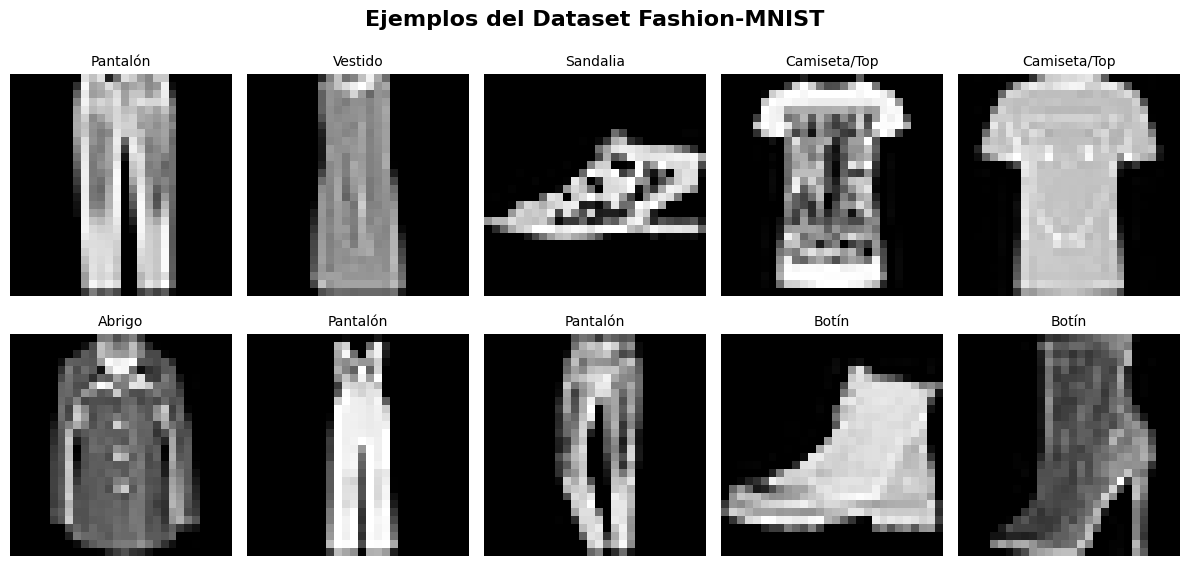

Ejemplos del dataset guardados en: ../results/1_cnn_classification/dataset_samples.png


In [2]:
# 1. Cargar datos
print("\n1. Cargando datos...")
data_loader = FashionMNISTData()
x_train, y_train, x_test, y_test = data_loader.load_data()
class_names = data_loader.get_class_names()

# Mostrar ejemplos del dataset
plot_sample_images(data_loader, NOTEBOOK_NAME)

In [3]:
# 2. Crear modelo
print("\n2. Creando modelo...")
model = create_cnn_model()
model = compile_model(model)
model.summary()


2. Creando modelo...


c:\Users\seneyda\Downloads\ml-portfolio-2025\ml-portfolio-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 470,122 (1.79 MB)

 Trainable params: 469,162 (1.79 MB)

 Non-trainable params: 960 (3.75 KB)

In [4]:
# 3. Entrenar modelo
print("\n3. Entrenando modelo...")
trainer = FashionMNISTTrainer(model, MODEL_NAME)
history = trainer.train_model(x_train, y_train, x_test, y_test, epochs=10)


3. Entrenando modelo...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6609 - loss: 0.9945
Epoch 1: val_accuracy improved from None to 0.86400, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 102s 102ms/step - accuracy: 0.7620 - loss: 0.6693 - val_accuracy: 0.8640 - val_loss: 0.3830 - learning_rate: 0.0010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8505 - loss: 0.4098
Epoch 2: val_accuracy improved from 0.86400 to 0.88490, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 101ms/step - accuracy: 0.8598 - loss: 0.3889 - val_accuracy: 0.8849 - val_loss: 0.3148 - learning_rate: 0.0010
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8784 - loss: 0.3368
Epoch 3: val_accuracy improved from 0.88490 to 0.89810, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 114s 121ms/step - accuracy: 0.8824 - loss: 0.3285 - val_accuracy: 0.8981 - val_loss: 0.2732 - learning_rate: 0.0010
Epoch 4/10
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8910 - loss: 0.3034
Epoch 4: val_accuracy improved from 0.89810 to 0.91080, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 102s 109ms/step - accuracy: 0.8934 - loss: 0.2982 - val_accuracy: 0.9108 - val_loss: 0.2486 - learning_rate: 0.0010
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9003 - loss: 0.2749
Epoch 5: val_accuracy improved from 0.91080 to 0.91310, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 114s 121ms/step - accuracy: 0.8996 - loss: 0.2754 - val_accuracy: 0.9131 - val_loss: 0.2407 - learning_rate: 0.0010
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9059 - loss: 0.2615
Epoch 6: val_accuracy improved from 0.91310 to 0.91720, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 98ms/step - accuracy: 0.9065 - loss: 0.2614 - val_accuracy: 0.9172 - val_loss: 0.2288 - learning_rate: 0.0010
Epoch 7/10
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9109 - loss: 0.2472
Epoch 7: val_accuracy did not improve from 0.91720
938/938 ━━━━━━━━━━━━━━━━━━━━ 89s 95ms/step - accuracy: 0.9107 - loss: 0.2466 - val_accuracy: 0.9068 - val_loss: 0.2576 - learning_rate: 0.0010
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9098 - loss: 0.2467
Epoch 8: val_accuracy improved from 0.91720 to 0.91830, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 93ms/step - accuracy: 0.9122 - loss: 0.2429 - val_accuracy: 0.9183 - val_loss: 0.2213 - learning_rate: 0.0010
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9199 - loss: 0.2226
Epoch 9: val_accuracy improved from 0.91830 to 0.91920, saving model to ../results/fashion_mnist_cnn_baseline_best.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 99ms/step - accuracy: 0.9181 - loss: 0.2287 - val_accuracy: 0.9192 - val_loss: 0.2217 - learning_rate: 0.0010
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9218 - loss: 0.2198
Epoch 10: val_accuracy did not improve from 0.91920
938/938 ━━━━━━━━━━━━━━━━━━━━ 110s 117ms/step - accuracy: 0.9215 - loss: 0.2190 - val_accuracy: 0.9063 - val_loss: 0.2462 - learning_rate: 0.0010
Tiempo de entrenamiento: 998.10 segundos


In [5]:
# 4. Evaluar modelo
print("\n4. Evaluando modelo...")
test_loss, test_accuracy = trainer.evaluate_model(x_test, y_test)



4. Evaluando modelo...
Precisión en test: 0.9063
Pérdida en test: 0.2462


In [6]:
# 5. Calcular métricas adicionales
print("\n5. Calculando métricas...")
y_true, y_pred, f1, report = calculate_metrics(model, x_test, y_test, class_names)




5. Calculando métricas...

MÉTRICAS DETALLADAS
F1 Score (weighted): 0.9069
Accuracy: 0.9063

Reporte por clase:
              precision    recall  f1-score   support

Camiseta/Top       0.94      0.74      0.83      1000
    Pantalón       0.99      0.98      0.99      1000
      Suéter       0.95      0.76      0.84      1000
     Vestido       0.88      0.94      0.91      1000
      Abrigo       0.79      0.92      0.85      1000
    Sandalia       0.98      0.98      0.98      1000
      Camisa       0.69      0.83      0.75      1000
   Zapatilla       0.95      0.99      0.97      1000
       Bolso       0.99      0.98      0.98      1000
       Botín       0.99      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [7]:
# 6. Guardar modelo y resultados
print("\n6. Guardando resultados...")
trainer.save_model(NOTEBOOK_NAME)
# Obtener métricas adicionales
training_time = trainer.get_training_time()
model_params = trainer.get_model_params()

# Guardar resultados
results = save_training_results(
    history, test_accuracy, test_loss, f1, 
    MODEL_NAME, NOTEBOOK_NAME, training_time, model_params
)

# Actualizar summary general
save_summary_csv(results, NOTEBOOK_NAME)



6. Guardando resultados...
Modelo guardado en: ../results/1_cnn_classification/fashion_mnist_cnn_baseline_model.h5
Resultados guardados en: ../results/1_cnn_classification/training_results.json
Métricas añadidas al summary general: ../results/summary.csv



7. Generando visualizaciones...


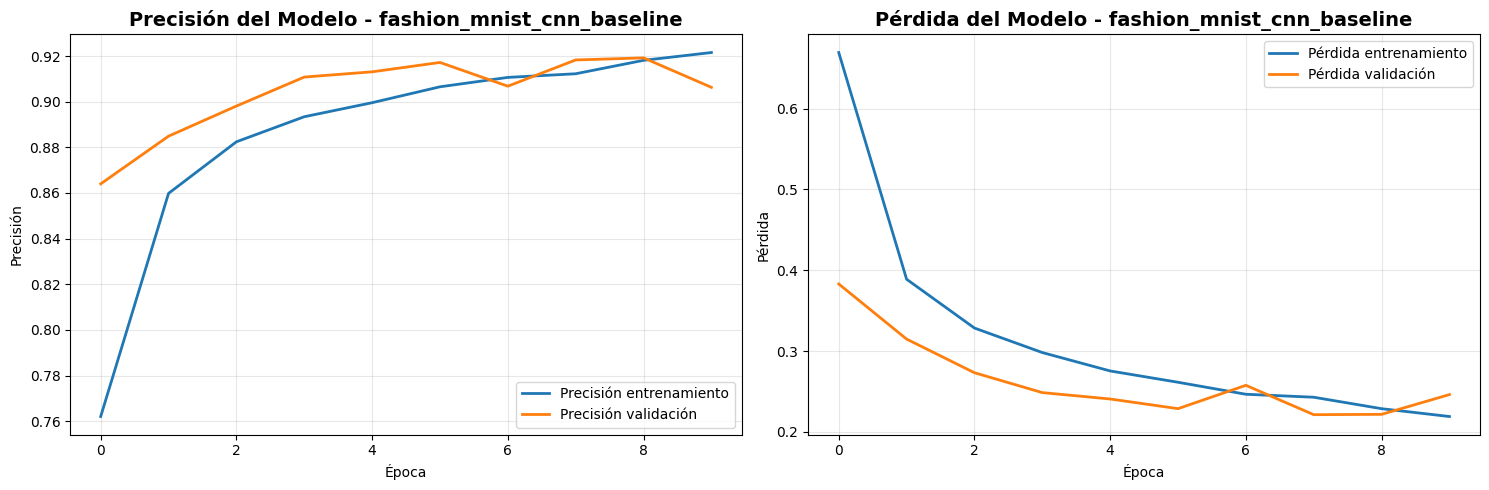

Curvas de aprendizaje guardadas en: ../results/1_cnn_classification/learning_curves.png


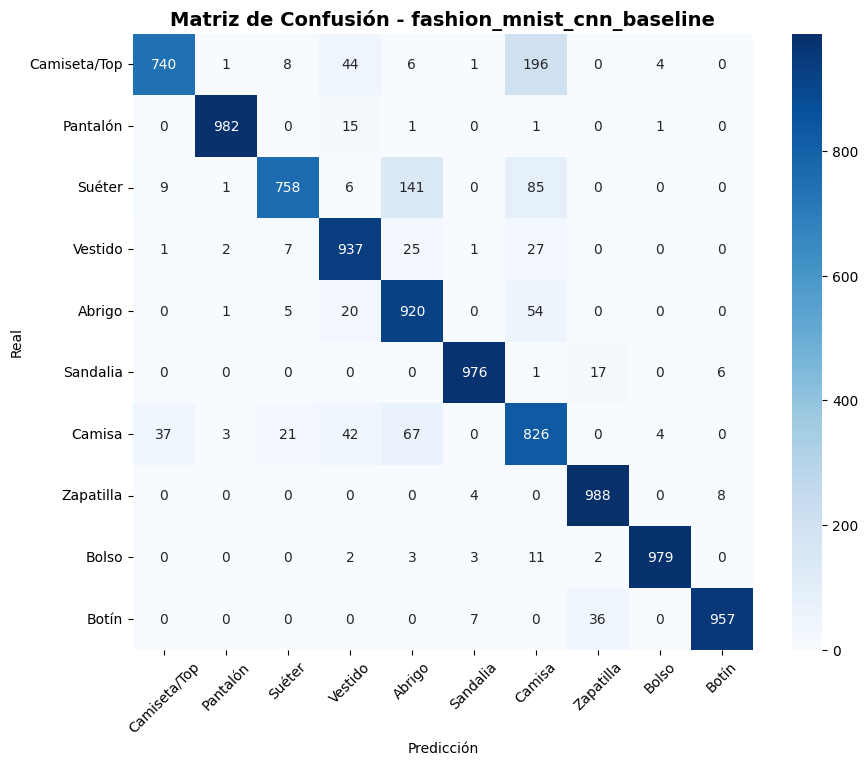

Matriz de confusión guardada en: ../results/1_cnn_classification/confusion_matrix.png


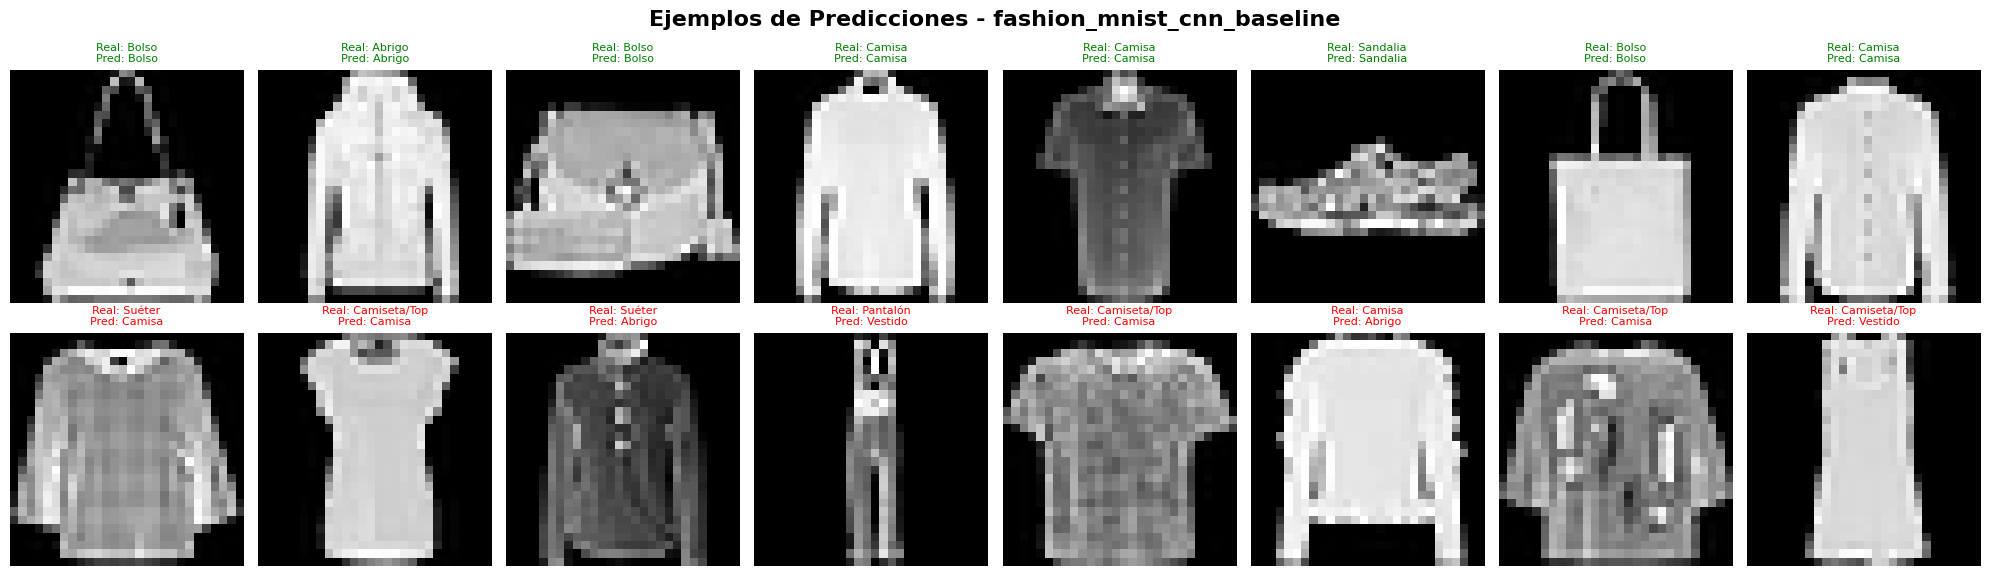

Ejemplos de predicciones guardados en: ../results/1_cnn_classification/prediction_examples.png
Modelo entrenado y evaluado correctamente

RESUMEN FINAL DEL MODELO
Modelo: fashion_mnist_cnn_baseline
Accuracy: 0.9063
F1 Score: 0.9069
Pérdida: 0.2462
Tiempo de entrenamiento: 998.10 segundos
Parámetros del modelo: 470,122


In [8]:
# 7. Visualizaciones
print("\n7. Generando visualizaciones...")
plot_training_history(history, NOTEBOOK_NAME, MODEL_NAME)
plot_confusion_matrix(y_true, y_pred, class_names, NOTEBOOK_NAME, MODEL_NAME)
plot_examples(model, x_test, y_test, class_names, NOTEBOOK_NAME, MODEL_NAME, num_examples=8)

print_completion_message()

# Mostrar resumen final
print("\n" + "="*60)
print("RESUMEN FINAL DEL MODELO")
print("="*60)
print(f"Modelo: {MODEL_NAME}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Pérdida: {test_loss:.4f}")
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"Parámetros del modelo: {model_params:,}")
print("="*60)